In [24]:
# import all the modules

import os
from tqdm import tqdm
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle as pkl
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import argparse
import random

# parser = argparse.ArgumentParser()

# parser.add_argument('--labels', type=str)
# parser.add_argument('--data_path', type=str)

# try:
#     print(parser.parse_args())
#     args = parser.parse_args()
# except IOError:
#     print(IOError)

In [36]:
class preprocess(object):
    '''
    Preprocess the data. This class forms arrays in the following structure:
    [
        class_1[
            [image, label],
            ..
        ]
        ..
        class_n..
    ]
    '''
    
    def __init__(self, labels, img_size):
        '''
        class constructor
        labels:   file path for class names
        img_size: size to which images should be resized
        '''
        self.img_size = img_size
        with open(labels, 'r') as fp:
            names = fp.readlines()
        self.labels = {x.strip():num for num,x in enumerate(names)}
        self.training_data = []
        self.testing_data = []
        self.data = []
    
    def make_training_data(self, data_path):
        '''
        Forms the training data structure as shown in the description of class
        data_path:   directory containing the image dataset
        '''
        num_classes = len(self.labels)
        class_count = {}
        total_grayscale = 0
        temp_train_data = []
        temp_test_data = []
        class_data = []
        count = 0
        task_count = []
        temp_data = []
        for label in tqdm(self.labels):
            index = int(label[:label.find('.')])
            if count == 250:
                break
            
            grayscale_count = 0
            for image in (os.listdir(os.path.join(data_path,label))):
                if '.jpg' in image:
                    try:
                        path = os.path.join(data_path,label,image)
                        img = cv2.imread(path, cv2.COLOR_BGR2RGB)
                        img = cv2.resize(img, (self.img_size, self.img_size))
                        if len(np.array(img).shape) != 3:
#                             print('img name:', path)
                            grayscale_count += 1
                            continue
                        #[img, one-hot vector of label]
                        label_index = int(label[:label.find('.')])
                        
                        # forms individual data point containing image and its label
                        temp_data.append([np.rollaxis(np.array(img),2,0), count%10])#np.eye(num_classes)[self.labels[label]]])
                        if not label in class_count:
                            class_count[label] = 1
                        else:
                            class_count[label] += 1
                    except Exception as e:
                        print('Exception in getting data')
#             temp_data = np.asarray(temp_data)
            
            if len(temp_data) < 50:
                continue
#             split_index = int(len(temp_data)*0.8)
            
            # training_data and testing_data is an array of data
#             temp_train_data.extend(temp_data[:split_index])
#             temp_test_data.extend(temp_data[split_index:]) 
            count += 1
            
            if count%10 == 0:
#                 self.training_data.append(temp_train_data)
#                 self.testing_data.append(temp_test_data)
#                 for cursor in temp_test_data:
#                     print('cursor:', cursor)
#                     self.testing_data.append(cursor)
#                 temp_train_data = []
#                 temp_test_data = []
                np.random.shuffle(temp_data)
                self.data.append(temp_data)
                task_count.append(len(temp_data))
                temp_data = []
                
        print('length per task:', task_count)
        pkl.dump([self.data, self.labels], open('v1.0_data.pkl', 'wb'))
        return self.data, self.labels
            
img_size = 32
read = preprocess('labels.txt', img_size)
data, labels = read.make_training_data('256_ObjectCategories')

# training_data = np.asarray(training_data)
# testing_data = np.asarray(testing_data)



  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 1/256 [00:00<01:23,  3.04it/s]

  1%|          | 2/256 [00:00<01:19,  3.21it/s]

  1%|          | 3/256 [00:01<01:26,  2.91it/s]

  2%|▏         | 4/256 [00:01<01:25,  2.94it/s]

  2%|▏         | 5/256 [00:01<01:25,  2.92it/s]

  2%|▏         | 6/256 [00:02<01:26,  2.90it/s]

  3%|▎         | 7/256 [00:02<01:23,  2.98it/s]

  3%|▎         | 8/256 [00:02<01:45,  2.36it/s]

  4%|▎         | 9/256 [00:03<02:26,  1.69it/s]

  4%|▍         | 10/256 [00:04<02:11,  1.87it/s]

  4%|▍         | 11/256 [00:05<02:28,  1.65it/s]

  5%|▍         | 12/256 [00:05<02:19,  1.75it/s]

  5%|▌         | 13/256 [00:06<02:23,  1.70it/s]

  5%|▌         | 14/256 [00:06<01:55,  2.10it/s]

  6%|▌         | 15/256 [00:06<01:40,  2.41it/s]

  6%|▋         | 16/256 [00:07<01:27,  2.74it/s]

  7%|▋         | 17/256 [00:07<01:19,  3.00it/s]

  7%|▋         | 18/256 [00:07<01:08,  3.46it/s]

  7%|▋         | 19/256 [00:07<01:03,  3.72it/s]

  8%|▊         |

 57%|█████▋    | 145/256 [01:13<01:22,  1.35it/s]

 57%|█████▋    | 146/256 [01:13<01:08,  1.60it/s]

 57%|█████▋    | 147/256 [01:14<01:14,  1.46it/s]

 58%|█████▊    | 148/256 [01:15<01:09,  1.56it/s]

 58%|█████▊    | 149/256 [01:15<00:58,  1.83it/s]

 59%|█████▊    | 150/256 [01:16<01:01,  1.74it/s]

 59%|█████▉    | 151/256 [01:16<00:53,  1.95it/s]

 59%|█████▉    | 152/256 [01:17<00:55,  1.88it/s]

 60%|█████▉    | 153/256 [01:17<00:44,  2.33it/s]

 60%|██████    | 154/256 [01:17<00:46,  2.19it/s]

 61%|██████    | 155/256 [01:18<00:40,  2.51it/s]

 61%|██████    | 156/256 [01:18<00:34,  2.90it/s]

 61%|██████▏   | 157/256 [01:18<00:31,  3.12it/s]

 62%|██████▏   | 158/256 [01:19<00:54,  1.81it/s]

 62%|██████▏   | 159/256 [01:21<01:20,  1.21it/s]

 62%|██████▎   | 160/256 [01:21<01:01,  1.55it/s]

 63%|██████▎   | 161/256 [01:21<00:52,  1.82it/s]

 63%|██████▎   | 162/256 [01:22<00:48,  1.94it/s]

 64%|██████▎   | 163/256 [01:22<00:41,  2.24it/s]

 64%|██████▍   | 164/256 [01:22

length per task: [1237, 1287, 1088, 1012, 1014, 957, 984, 995, 1051, 1238, 1199, 1036, 1234, 1232, 1885, 1133, 978, 924, 979, 1107, 965, 1007, 987, 1363, 927]


In [38]:
index = 1
for i in data:
    temp = random.sample(i, 5)
    print("index:", index, len(i))
    for j in temp:
        print(j[1])
    index += 1

index: 1 1237
8
8
1
1
9
index: 2 1287
0
0
6
1
8
index: 3 1088
5
2
0
3
7
index: 4 1012
6
8
1
4
6
index: 5 1014
2
5
9
3
2
index: 6 957
1
3
3
0
4
index: 7 984
2
3
1
4
2
index: 8 995
2
9
0
1
5
index: 9 1051
9
8
6
5
2
index: 10 1238
9
5
1
3
1
index: 11 1199
3
2
8
7
0
index: 12 1036
8
5
6
2
9
index: 13 1234
8
7
9
1
1
index: 14 1232
7
0
2
9
1
index: 15 1885
8
2
4
0
4
index: 16 1133
8
2
7
4
4
index: 17 978
0
1
7
8
7
index: 18 924
8
0
6
9
3
index: 19 979
2
5
8
9
7
index: 20 1107
2
7
4
6
3
index: 21 965
9
3
4
2
3
index: 22 1007
7
2
4
1
0
index: 23 987
7
3
5
6
9
index: 24 1363
7
5
6
6
1
index: 25 927
0
9
0
7
3


In [39]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device being used:', device)
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
dataset = pkl.load(open('v1.0_data.pkl', 'rb'))
data, labels = dataset[0], dataset[1]

train_set = []
val_set = []
test_set = []

for task in data:
    size = len(task)
    print(size, int(size*0.8), int(size*0.1))
    train_set.append(task[: int(size*0.8)])
    val_set.append(task[int(size*0.8): -int(size*0.1)])
    test_set.append(task[-int(size*0.1):])

Device being used: cpu
1237 989 123
1287 1029 128
1088 870 108
1012 809 101
1014 811 101
957 765 95
984 787 98
995 796 99
1051 840 105
1238 990 123
1199 959 119
1036 828 103
1234 987 123
1232 985 123
1885 1508 188
1133 906 113
978 782 97
924 739 92
979 783 97
1107 885 110
965 772 96
1007 805 100
987 789 98
1363 1090 136
927 741 92


In [40]:
for i in range(len(val_set)):
    print(len(test_set[i]), len(val_set[i]))

123 125
128 130
108 110
101 102
101 102
95 97
98 99
99 100
105 106
123 125
119 121
103 105
123 124
123 124
188 189
113 114
97 99
92 93
97 99
110 112
96 97
100 102
98 100
136 137
92 94


In [41]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*4*4, 500)
        self.fc2 = nn.Linear(500, 10)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, 64*4*4)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
#         return F.softmax(x, dim=1)
        return x
    


In [42]:
# x = torch.Tensor([i[0] for i in training_data]).view(-1, 32, 32)
# x = x/255.0
# y = torch.Tensor([i[1] for i in testing_data])


n_epochs = 3
lrs = [0.1, 0.01, 0.02, 0.05, 0.001]
valid_loss_min = np.Inf
img_size = 32
train_loss_per_addition = []
train_loss_per_batch = []
valid_loss_per_addition = []
valid_loss_per_batch = []
accuracy_per_batch = []
valid_results = []
final_results = []

model.train()
for rate in lrs:
    print('training with learning rate = ', rate)
    model = Net()

    if train_on_gpu:
        model.to(device)

    criterion = nn.CrossEntropyLoss()

    optimizer = optim.Adam(model.parameters(), lr=rate)
    train_loss = 0.0
    valid_loss = 0.0
    correct = 0
    train_len = 0
    valid_len = len(test_set)
    count = 1
    val_accuracy = []

    for class_batch in tqdm(train_set):
#         print('Processing class number:',count)
        
        count += 1
        temp = class_batch
        np.random.shuffle(temp)
        train_len += len(class_batch)
        batch_x = torch.Tensor([i[0] for i in temp]).view(-1, 3,img_size, img_size)
        batch_x = batch_x/255.0
        batch_y = torch.Tensor([i[1] for i in temp])
        batch_y = batch_y.long()
                
        if train_on_gpu:
            batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        
        model.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        
        # loss is averaged over batch size, hence it is multiplied back
        train_loss += loss.item() * len(batch_x)
        train_loss_per_addition.append(loss.item() * len(batch_x))
        train_loss_per_batch.append(train_loss)
        
        model.eval()
        val_row = []
        for val_data in val_set:
            temp_val = val_data
            np.random.shuffle(temp_val)
#         print('first test image:',testing_data[0])
            test_batch_x = torch.Tensor([i[0] for i in temp_val]).view(-1, 3, img_size, img_size)
            test_batch_x = test_batch_x/255.0
            test_batch_y = torch.Tensor([i[1] for i in temp_val])
            test_batch_y = test_batch_y.long()

            if train_on_gpu:
                test_batch_x, test_batch_y = test_batch_x.cuda(), test_batch_y.cuda()
            
            output = model(test_batch_x)
            loss = criterion(output, test_batch_y)
            valid_loss += loss.item() * len(test_batch_x)
            valid_loss_per_addition.append(loss.item() * len(test_batch_x))
            valid_loss_per_batch.append(valid_loss)
            correct = 0
            total = 0
            for i in range(len(output)):
                if torch.equal(torch.argmax(output[i]), test_batch_y[i]):
                    correct += 1
                total += 1
            val_row.append(round(correct/total, 2))
        val_accuracy.append(val_row)
        model.train()
    accuracy = sum(val_accuracy[-1])/len(val_accuracy[-1])
    valid_results.append(accuracy)
    
    
        
model.eval()
torch.save(model.state_dict(), 'model_v1.0.pth')




  0%|          | 0/25 [00:00<?, ?it/s]

training with learning rate =  0.1





  4%|▍         | 1/25 [00:04<01:52,  4.68s/it]


  8%|▊         | 2/25 [00:08<01:43,  4.51s/it]


 12%|█▏        | 3/25 [00:12<01:34,  4.30s/it]


 16%|█▌        | 4/25 [00:16<01:28,  4.20s/it]


 20%|██        | 5/25 [00:20<01:20,  4.02s/it]


 24%|██▍       | 6/25 [00:23<01:14,  3.92s/it]


 28%|██▊       | 7/25 [00:27<01:09,  3.87s/it]


 32%|███▏      | 8/25 [00:31<01:05,  3.85s/it]


 36%|███▌      | 9/25 [00:35<01:02,  3.90s/it]


 40%|████      | 10/25 [00:39<01:00,  4.02s/it]


 44%|████▍     | 11/25 [00:43<00:55,  3.97s/it]


 48%|████▊     | 12/25 [00:47<00:51,  3.93s/it]


 52%|█████▏    | 13/25 [00:52<00:49,  4.12s/it]


 56%|█████▌    | 14/25 [00:56<00:45,  4.10s/it]


 60%|██████    | 15/25 [01:01<00:45,  4.57s/it]


 64%|██████▍   | 16/25 [01:05<00:39,  4.38s/it]


 68%|██████▊   | 17/25 [01:09<00:34,  4.30s/it]


 72%|███████▏  | 18/25 [01:13<00:29,  4.17s/it]


 76%|███████▌  | 19/25 [01:17<00:23,  4.00s/it]


 80%|████████  | 20/25 [01:21<00:19,  3.98s/it]


 84%|█

training with learning rate =  0.01





  4%|▍         | 1/25 [00:04<01:42,  4.27s/it]


  8%|▊         | 2/25 [00:08<01:37,  4.25s/it]


 12%|█▏        | 3/25 [00:12<01:32,  4.19s/it]


 16%|█▌        | 4/25 [00:16<01:24,  4.01s/it]


 20%|██        | 5/25 [00:19<01:17,  3.88s/it]


 24%|██▍       | 6/25 [00:23<01:13,  3.86s/it]


 28%|██▊       | 7/25 [00:27<01:08,  3.81s/it]


 32%|███▏      | 8/25 [00:30<01:04,  3.77s/it]


 36%|███▌      | 9/25 [00:34<00:59,  3.72s/it]


 40%|████      | 10/25 [00:38<00:55,  3.71s/it]


 44%|████▍     | 11/25 [00:41<00:52,  3.72s/it]


 48%|████▊     | 12/25 [00:45<00:47,  3.66s/it]


 52%|█████▏    | 13/25 [00:49<00:44,  3.71s/it]


 56%|█████▌    | 14/25 [00:52<00:40,  3.70s/it]


 60%|██████    | 15/25 [00:57<00:40,  4.06s/it]


 64%|██████▍   | 16/25 [01:01<00:35,  3.95s/it]


 68%|██████▊   | 17/25 [01:05<00:30,  3.81s/it]


 72%|███████▏  | 18/25 [01:08<00:26,  3.74s/it]


 76%|███████▌  | 19/25 [01:13<00:23,  3.95s/it]


 80%|████████  | 20/25 [01:17<00:20,  4.00s/it]


 84%|█

training with learning rate =  0.02





  4%|▍         | 1/25 [00:05<02:02,  5.11s/it]


  8%|▊         | 2/25 [00:09<01:53,  4.92s/it]


 12%|█▏        | 3/25 [00:13<01:43,  4.71s/it]


 16%|█▌        | 4/25 [00:18<01:36,  4.57s/it]


 20%|██        | 5/25 [00:21<01:26,  4.30s/it]


 24%|██▍       | 6/25 [00:25<01:17,  4.07s/it]


 28%|██▊       | 7/25 [00:28<01:09,  3.87s/it]


 32%|███▏      | 8/25 [00:32<01:03,  3.74s/it]


 36%|███▌      | 9/25 [00:35<00:59,  3.69s/it]


 40%|████      | 10/25 [00:40<00:58,  3.93s/it]


 44%|████▍     | 11/25 [00:44<00:55,  3.97s/it]


 48%|████▊     | 12/25 [00:48<00:50,  3.91s/it]


 52%|█████▏    | 13/25 [00:51<00:47,  3.94s/it]


 56%|█████▌    | 14/25 [00:56<00:44,  4.05s/it]


 60%|██████    | 15/25 [01:01<00:44,  4.42s/it]


 64%|██████▍   | 16/25 [01:05<00:39,  4.35s/it]


 68%|██████▊   | 17/25 [01:09<00:32,  4.09s/it]


 72%|███████▏  | 18/25 [01:12<00:26,  3.84s/it]


 76%|███████▌  | 19/25 [01:16<00:23,  3.84s/it]


 80%|████████  | 20/25 [01:20<00:19,  3.99s/it]


 84%|█

training with learning rate =  0.05





  4%|▍         | 1/25 [00:04<01:37,  4.06s/it]


  8%|▊         | 2/25 [00:08<01:33,  4.06s/it]


 12%|█▏        | 3/25 [00:11<01:26,  3.95s/it]


 16%|█▌        | 4/25 [00:15<01:20,  3.82s/it]


 20%|██        | 5/25 [00:19<01:15,  3.78s/it]


 24%|██▍       | 6/25 [00:22<01:11,  3.75s/it]


 28%|██▊       | 7/25 [00:26<01:07,  3.74s/it]


 32%|███▏      | 8/25 [00:30<01:04,  3.78s/it]


 36%|███▌      | 9/25 [00:34<01:01,  3.83s/it]


 40%|████      | 10/25 [00:38<00:58,  3.93s/it]


 44%|████▍     | 11/25 [00:42<00:56,  4.01s/it]


 48%|████▊     | 12/25 [00:46<00:51,  3.97s/it]


 52%|█████▏    | 13/25 [00:51<00:49,  4.14s/it]


 56%|█████▌    | 14/25 [00:56<00:51,  4.65s/it]


 60%|██████    | 15/25 [01:01<00:47,  4.78s/it]


 64%|██████▍   | 16/25 [01:05<00:39,  4.40s/it]


 68%|██████▊   | 17/25 [01:08<00:32,  4.03s/it]


 72%|███████▏  | 18/25 [01:11<00:26,  3.74s/it]


 76%|███████▌  | 19/25 [01:14<00:21,  3.57s/it]


 80%|████████  | 20/25 [01:18<00:17,  3.50s/it]


 84%|█

training with learning rate =  0.001





  4%|▍         | 1/25 [00:04<01:43,  4.30s/it]


  8%|▊         | 2/25 [00:08<01:38,  4.28s/it]


 12%|█▏        | 3/25 [00:13<01:39,  4.51s/it]


 16%|█▌        | 4/25 [00:18<01:37,  4.63s/it]


 20%|██        | 5/25 [00:23<01:32,  4.63s/it]


 24%|██▍       | 6/25 [00:27<01:24,  4.46s/it]


 28%|██▊       | 7/25 [00:30<01:16,  4.22s/it]


 32%|███▏      | 8/25 [00:34<01:09,  4.06s/it]


 36%|███▌      | 9/25 [00:38<01:03,  3.98s/it]


 40%|████      | 10/25 [00:42<00:59,  4.00s/it]


 44%|████▍     | 11/25 [00:46<00:55,  3.98s/it]


 48%|████▊     | 12/25 [00:50<00:50,  3.90s/it]


 52%|█████▏    | 13/25 [00:54<00:47,  3.94s/it]


 56%|█████▌    | 14/25 [00:57<00:43,  3.93s/it]


 60%|██████    | 15/25 [01:03<00:42,  4.28s/it]


 64%|██████▍   | 16/25 [01:06<00:37,  4.15s/it]


 68%|██████▊   | 17/25 [01:10<00:32,  4.02s/it]


 72%|███████▏  | 18/25 [01:14<00:27,  3.91s/it]


 76%|███████▌  | 19/25 [01:17<00:22,  3.81s/it]


 80%|████████  | 20/25 [01:21<00:19,  3.81s/it]


 84%|█

In [43]:
valid_results

[0.10400000000000001, 0.1036, 0.102, 0.11000000000000001, 0.09200000000000003]

In [44]:
# x = torch.Tensor([i[0] for i in training_data]).view(-1, 32, 32)
# x = x/255.0
# y = torch.Tensor([i[1] for i in testing_data])


n_epochs = 1
lrs = [0.05]
valid_loss_min = np.Inf
img_size = 32
train_loss_per_addition = []
train_loss_per_batch = []
test_loss_per_addition = []
test_loss_per_batch = []
accuracy_per_batch = []
valid_results = []
final_results = []

for rate in lrs:
    print('training with learning rate = ', rate)
    model = Net()
    if train_on_gpu:
        model.to(device)

    criterion = nn.CrossEntropyLoss()

    optimizer = optim.Adam(model.parameters(), lr=rate)
    train_loss = 0.0
    valid_loss = 0.0
    train_len = 0
    correct = 0
    count = 1
    model.train()
    for class_batch in tqdm(train_set):
#         print('Processing class number:',count)
#         print('length:',len(class_batch))
#         print(class_batch[:3])
        count += 1
        temp = class_batch
        np.random.shuffle(temp)
#         print('len of temp:', len(temp), temp[:3])
        train_len += len(class_batch)
        batch_x = torch.Tensor([i[0] for i in temp]).view(-1, 3,img_size, img_size)
        batch_x = batch_x/255.0
        batch_y = torch.Tensor([i[1] for i in temp])
        batch_y = batch_y.long()
                
        if train_on_gpu:
            batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        
        model.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        
        # loss is averaged over batch size, hence it is multiplied back
        train_loss += loss.item() * len(batch_x)
        train_loss_per_addition.append(loss.item() * len(batch_x))
        train_loss_per_batch.append(train_loss)
        
        model.eval()
        test_row = []
        for test_data in test_set:
            temp_val = test_data
            np.random.shuffle(temp_val)
#             print('first test image:',test_data[0])
            test_batch_x = torch.Tensor([i[0] for i in temp_val]).view(-1, 3, img_size, img_size)
            test_batch_x = test_batch_x/255.0
            test_batch_y = torch.Tensor([i[1] for i in temp_val])
            test_batch_y = test_batch_y.long()

            if train_on_gpu:
                test_batch_x, test_batch_y = test_batch_x.cuda(), test_batch_y.cuda()
            
            output = model(test_batch_x)
#             loss = criterion(output, test_batch_y)
#             test_loss += loss.item() * len(test_batch_x)
#             test_loss_per_addition.append(loss.item() * len(test_batch_x))
#             test_loss_per_batch.append(test_loss)
            correct = 0
            total = 0
            for i in range(len(output)):
                if torch.equal(torch.argmax(output[i]), test_batch_y[i]):
                    correct += 1
                total += 1
            test_row.append(round(correct/total, 2))
        final_results.append(test_row)
        model.train()
    
        
model.eval()
torch.save(model.state_dict(), 'model_v1.0.pth')




  0%|          | 0/25 [00:00<?, ?it/s]

training with learning rate =  0.05





  4%|▍         | 1/25 [00:04<01:39,  4.14s/it]


  8%|▊         | 2/25 [00:09<01:41,  4.40s/it]


 12%|█▏        | 3/25 [00:13<01:35,  4.36s/it]


 16%|█▌        | 4/25 [00:17<01:30,  4.33s/it]


 20%|██        | 5/25 [00:21<01:23,  4.16s/it]


 24%|██▍       | 6/25 [00:25<01:15,  4.00s/it]


 28%|██▊       | 7/25 [00:28<01:09,  3.86s/it]


 32%|███▏      | 8/25 [00:32<01:04,  3.77s/it]


 36%|███▌      | 9/25 [00:35<00:59,  3.74s/it]


 40%|████      | 10/25 [00:39<00:56,  3.78s/it]


 44%|████▍     | 11/25 [00:43<00:52,  3.78s/it]


 48%|████▊     | 12/25 [00:47<00:48,  3.73s/it]


 52%|█████▏    | 13/25 [00:51<00:45,  3.83s/it]


 56%|█████▌    | 14/25 [00:55<00:43,  3.96s/it]


 60%|██████    | 15/25 [01:00<00:43,  4.34s/it]


 64%|██████▍   | 16/25 [01:04<00:37,  4.21s/it]


 68%|██████▊   | 17/25 [01:08<00:32,  4.02s/it]


 72%|███████▏  | 18/25 [01:11<00:26,  3.84s/it]


 76%|███████▌  | 19/25 [01:15<00:23,  3.89s/it]


 80%|████████  | 20/25 [01:19<00:19,  3.90s/it]


 84%|█

In [45]:
import csv
with open("out.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(final_results)
print('average accuracy =', sum(final_results[-1])/25)

average accuracy = 0.11159999999999995


<IPython.core.display.Javascript object>


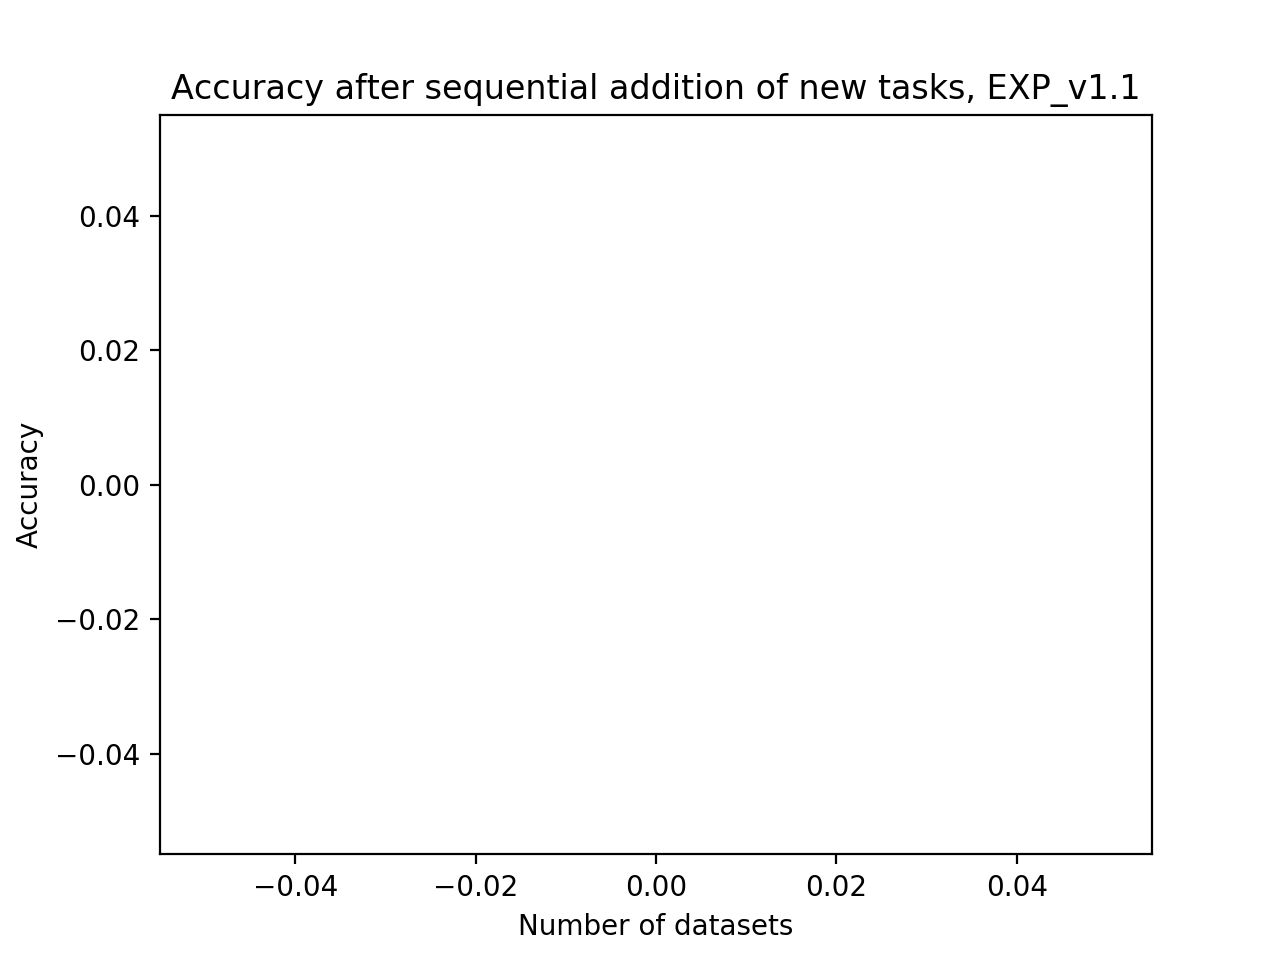

In [46]:
%matplotlib notebook

plt.plot(list(range(len(accuracy_per_batch))), accuracy_per_batch)
plt.title('Accuracy after sequential addition of new tasks, EXP_v1.1')
plt.xlabel('Number of datasets')
plt.ylabel('Accuracy')
plt.show()

In [9]:
plt.savefig('results_v1.1.jpg')